In [1]:
import cv2
print('Versão da OpenCV: ', cv2.__version__, end='\n\n')
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

Versão da OpenCV:  3.4.1



## Imagem original

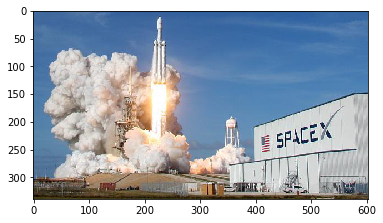

In [42]:
imagem = cv2.imread('falcon.jpg')
img = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB) # equivalente a img = imagem[:,:,::-1] # inverte de BGR para RGB
imshow(img)
#imshow(np.asarray(imagem[:, :, ::-1])) # altera a ultima dimensão para trocar azul por vermelho -> BRG to RGB

## 8 Threshold

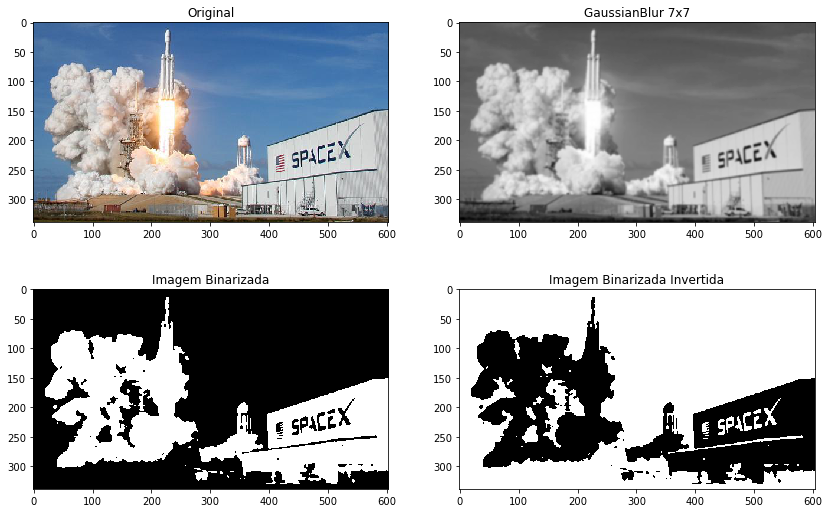

In [43]:
#Converte a imagem para tons de cinza
gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY) # equivalente a img = imagem[:,:,::-1] # inverte de BGR para RGB
blur = cv2.GaussianBlur(gray, (7, 7), 0) # aplica blur
(T, bin) = cv2.threshold(blur, 160, 255, cv2.THRESH_BINARY)
(T, binI) = cv2.threshold(blur, 160, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(14, 9)) # LARGura e ALTura da imagem total em polegadas
plt.subplot2grid((2,2),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.subplot2grid((2,2),(0,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('GaussianBlur 7x7')
plt.imshow(blur, cmap='gray')
plt.subplot2grid((2,2),(1,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('Imagem Binarizada')
plt.imshow(bin, cmap='gray')
plt.subplot2grid((2,2),(1,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('Imagem Binarizada Invertida')
plt.imshow(binI, cmap='gray')

## 8.1 Threshold adaptativo

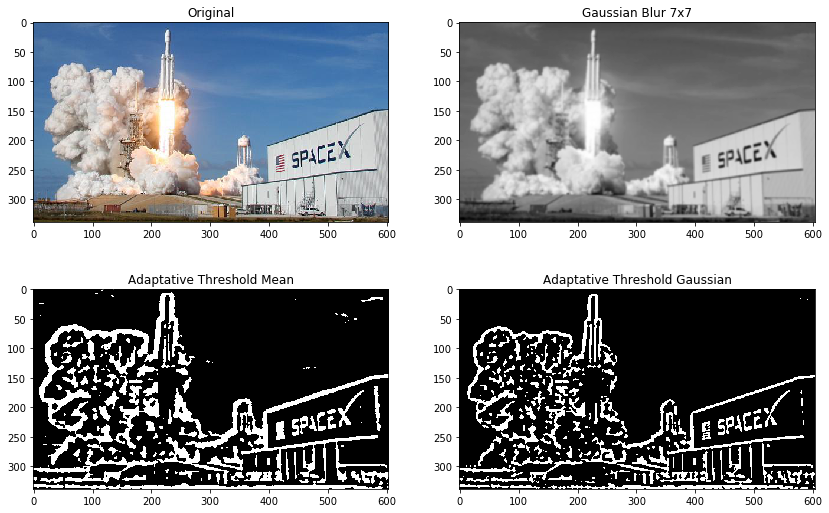

In [44]:
#Converte a imagem para tons de cinza
gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY) # equivalente a img = imagem[:,:,::-1] # inverte de BGR para RGB
blur = cv2.GaussianBlur(gray, (7, 7), 0) # aplica blur
bin1 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                             cv2.THRESH_BINARY_INV, 21, 5)
bin2 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                             cv2.THRESH_BINARY_INV, 21, 5)
plt.figure(figsize=(14, 9)) # LARGura e ALTura da imagem total em polegadas
plt.subplot2grid((2,2),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.subplot2grid((2,2),(0,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('Gaussian Blur 7x7')
plt.imshow(blur, cmap='gray')
plt.subplot2grid((2,2),(1,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('Adaptative Threshold Mean')
plt.imshow(bin1, cmap='gray')
plt.subplot2grid((2,2),(1,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('Adaptative Threshold Gaussian')
plt.imshow(bin2, cmap='gray')

## 8.2 Threshold com Otsu e Riddler-Calvard

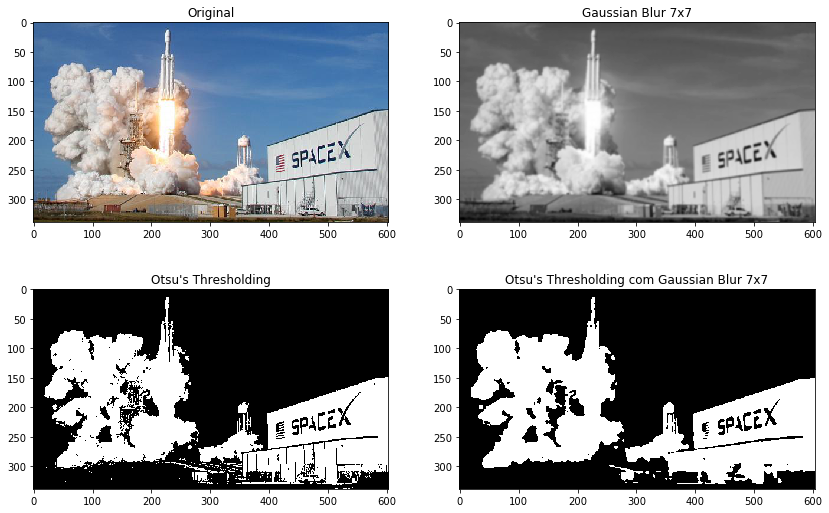

In [45]:
#Converte a imagem para tons de cinza
gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY) # equivalente a img = imagem[:,:,::-1] # inverte de BGR para RGB
blur = cv2.GaussianBlur(gray, (7, 7), 0) # aplica blur
# Otsu's thresholding
ret2, th2 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
ret3, th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(14, 9)) # LARGura e ALTura da imagem total em polegadas
plt.subplot2grid((2,2),(0,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.subplot2grid((2,2),(0,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title('Gaussian Blur 7x7')
plt.imshow(blur, cmap='gray')
plt.subplot2grid((2,2),(1,0)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Otsu's Thresholding")
plt.imshow(th2, cmap='gray')
plt.subplot2grid((2,2),(1,1)) #(linhas, colunas) do grid (l,c) do elemento
plt.title("Otsu's Thresholding com Gaussian Blur 7x7")
plt.imshow(th3, cmap='gray')